In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

1. Load the dataset

In [2]:
df = pd.read_csv("parkinsons.data")

 2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the      file,number of attributes, types of attributes and a general idea of likely challenges in the dataset. (2.5 points)

In [3]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
df.drop('name', axis = 1, inplace = True )

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null float64
D2                  195 non-null flo

In [6]:
df.isnull().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


3. Using univariate &amp; bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations?

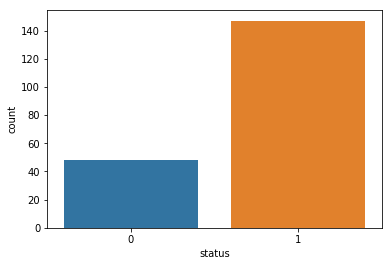

In [8]:
sns.countplot(x=df['status'])

Since the data has more 1's , the model created will be a better predicitor of 1's 

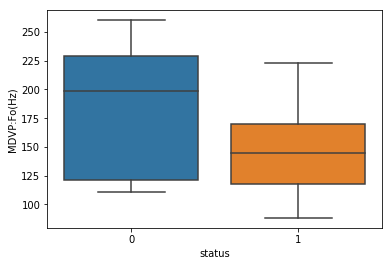

In [9]:
sns.boxplot(y= 'MDVP:Fo(Hz)', x= 'status', data = df)

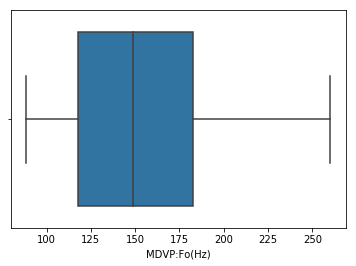

In [10]:
sns.boxplot(x=df["MDVP:Fo(Hz)"])

No outliers are present in the data , but it looks slightly right skewed 

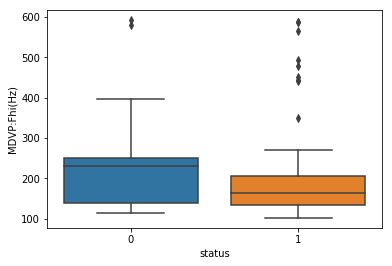

In [11]:
sns.boxplot(y= 'MDVP:Fhi(Hz)', x= 'status', data = df)

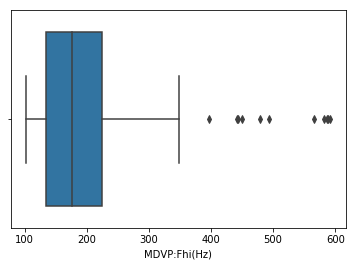

In [12]:
sns.boxplot(x=df["MDVP:Fhi(Hz)"])

A significant number of outliers are present and it also shows the data is right skewed 

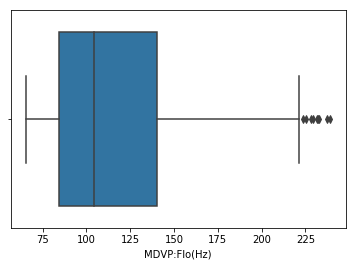

In [13]:
sns.boxplot(x=df["MDVP:Flo(Hz)"])

The column contains outliers and also the column is right skewed 

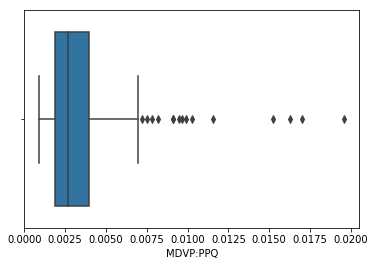

In [14]:
sns.boxplot(x=df["MDVP:PPQ"])  

The data is basically right skewed , and there are plently of outliers present 

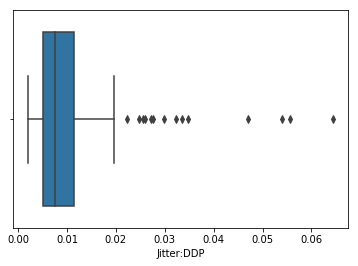

In [15]:
sns.boxplot(x=df["Jitter:DDP"])  

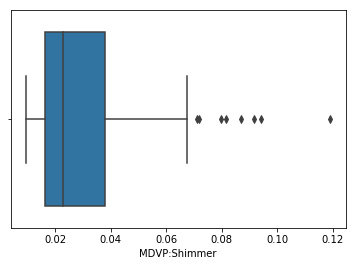

In [16]:
sns.boxplot(x=df["MDVP:Shimmer"]) 

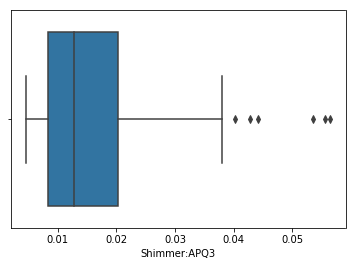

In [17]:
sns.boxplot(x=df["Shimmer:APQ3"])

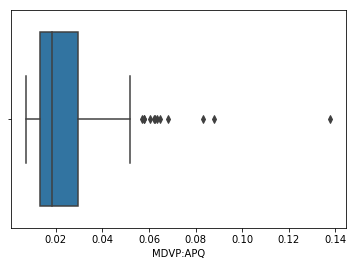

In [18]:
sns.boxplot(x=df["MDVP:APQ"])

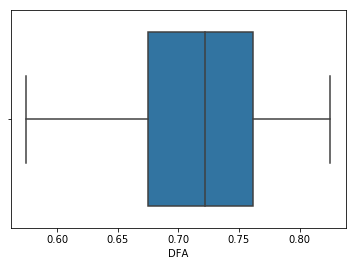

In [19]:
sns.boxplot(x=df["DFA"])

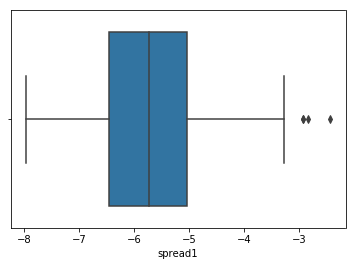

In [20]:
sns.boxplot(x=df["spread1"])

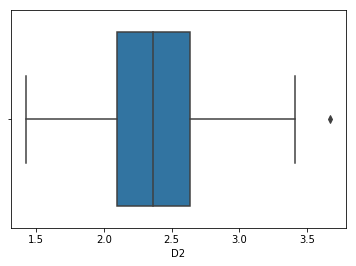

In [21]:
sns.boxplot(x=df["D2"]) 

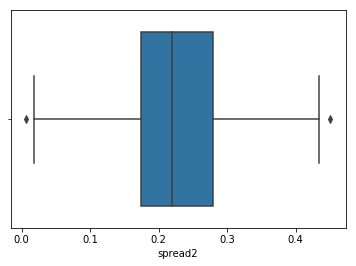

In [22]:
sns.boxplot(x=df["spread2"]) 

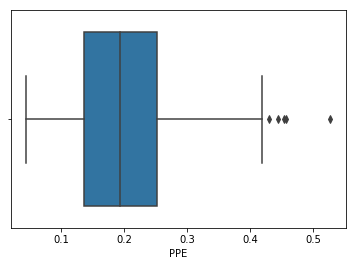

In [23]:
sns.boxplot(x=df["PPE"])

The data looks right skewed with onyl a few outliers 

Most of the data looks right skewed ,hence there are a lot of outliers present but we need not remove outliers are we are going to use decision tree and random forest which are basically not affected by outliers.

In [24]:
##moving the status (class) column to the right end of the dataframe
cols_at_end = ['status']
df = df[[c for c in df if c not in cols_at_end] 
        + [c for c in cols_at_end if c in df]]
df.head(5)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


QUESTION 4 - Split the dataset into training and test set in the ratio of 70:30 (Training:Test)

In [25]:
x = df.drop('status', axis = 1)
y = df['status']

In [26]:
print(x.shape)
print(y.shape)

(195, 22)
(195,)


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=3)

5. Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)

In [28]:
dt_model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)

In [29]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

6. Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. (7.5 points)

In [30]:
y_predict_test = dt_model.predict(X_test)
y_predict_train = dt_model.predict(X_train)

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [32]:
print("Train accuracy is", accuracy_score(y_train,y_predict_train))
print("Test accuracy is", accuracy_score(y_test,y_predict_test))

Train accuracy is 0.9926470588235294
Test accuracy is 0.847457627118644


In [33]:
print(confusion_matrix(y_test, y_predict_test))

[[11  2]
 [ 7 39]]


In [34]:
pred = pd.DataFrame(columns = ['Actual', 'Predicted'])

In [35]:
pred['Actual'] = y_test
pred['Predicted'] = y_predict_test

In [36]:
pred.head()

,Actual,Predicted
34,0,0
25,1,1
14,1,1
102,1,1
111,1,0


7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points)

In [37]:
from sklearn.model_selection import GridSearchCV
parameters= {'max_depth' : [3,4,5,6,7], 'min_samples_leaf' : [2,4,6,8]}

In [38]:
model = DecisionTreeClassifier()

In [39]:
rf_grid_search = GridSearchCV(model, parameters, scoring='roc_auc')
rf_grid_search.fit(X_train,y_train)
grid_search_results = rf_grid_search.cv_results_
print("Max score achieved",rf_grid_search.best_score_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Max score achieved 0.9030126087868302


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


We can see that after regluarazing the parameters , the accuracy score has increased from 84.7% to 89.3%, which makes it a better model

8. Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)

In [40]:
# Ensemble RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 10,random_state=1)
rfcl = rfcl.fit(X_train, y_train)

In [41]:
y_pred_test = rfcl.predict_proba(X_test)[:,1]
y_pred_train = rfcl.predict_proba(X_train)[:,1]

In [42]:
from sklearn.metrics import roc_auc_score
print("train auc is",roc_auc_score(y_train,y_pred_train))

train auc is 1.0


The accuracy score is 1 which clearly states that the model is over fitted, hence we will now be implementing random forest classifier using Grid search  

In [43]:
max_feat = list(range(5,10))
sample_leaf_range = list(range(1, 50))
grid = {'max_depth' : list(range(2,30)), 'min_samples_leaf' : sample_leaf_range}

In [44]:
grid3 = {'n_estimators' : list(range(1,100))}

rfcl_cv = GridSearchCV(rfcl, grid, scoring='accuracy', cv = 5)

In [45]:
rfcl_cv.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [46]:
print("Max score achieved",rfcl_cv.best_score_)

Max score achieved 0.9117647058823529


In [47]:
print("Optimal values of hyperparameters are", rfcl_cv.best_params_)

Optimal values of hyperparameters are {'max_depth': 5, 'min_samples_leaf': 1}


In [48]:
print("Optimal value of Trees - ", rfcl_cv.best_estimator_.n_estimators)

Optimal value of Trees -  10
